In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
print("Preparing test data..")
market_test_df = pd.read_csv("../data/market_test_df.csv").drop('Unnamed: 0', axis=1)
test_target = market_test_df['returnsOpenNextMktres10']
test_target = test_target.clip(test_target.quantile(0.001), test_target.quantile(0.999))
test_time = market_test_df['time']
market_test_df.drop(['returnsOpenNextMktres10'], axis=1, inplace=True)

Preparing test data..


In [5]:
import model_lgbm_71

/Users/alex/Desktop/Coding/AI/two-sigma-kaggle/env3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [6]:
m = model_lgbm_71.model('DecisionTree.model_lgbm_71')


init model DecisionTree.model_lgbm_71


In [7]:
m._load()

[_load] models loaded succesfully


In [14]:
predictions = m.predict([market_test_df, None],verbose=True)

Starting prediction for model DecisionTree.model_lgbm_71, Thu Jan  3 01:48:40 2019
Starting features generation for model DecisionTree.model_lgbm_71, Thu Jan  3 01:48:40 2019
['LGIH.O' 'LGND.O' 'LH.N' ... 'CVGW.O' 'TKC.N' 'TROX.N']
total 2007 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 84.08511996269226
X_test shape (100000, 48)
Finished prediction for model DecisionTree.model_lgbm_71, TIME 95.25767922401428


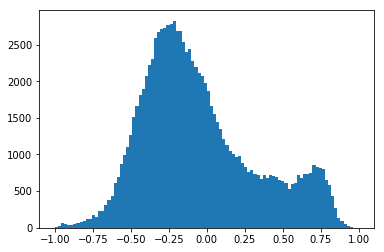

In [18]:
plt.hist(predictions, bins='auto')
plt.show()

In [21]:
from sigma_score import sigma_score

In [24]:
sigma_score(predictions, test_target, test_time)

0.08753397668985864

In [28]:
generated_features = m._generate_features(market_test_df, None,verbose=True)

Starting features generation for model DecisionTree.model_lgbm_71, Thu Jan  3 01:56:14 2019
['LGIH.O' 'LGND.O' 'LH.N' ... 'CVGW.O' 'TKC.N' 'TROX.N']
total 2007 df
Finished features generation for model DecisionTree.model_lgbm_71, TIME 64.16728711128235


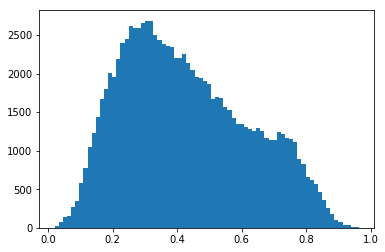

In [45]:
m1 = m.model1.predict(generated_features.values)
plt.hist(m1, bins='auto')
plt.show()

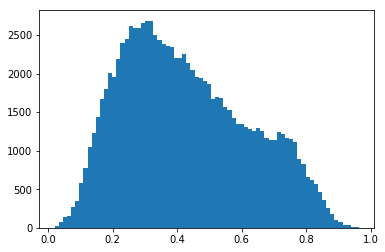

In [35]:
m2 = m.model1.predict(generated_features)
plt.hist(m2, bins='auto')
plt.show()

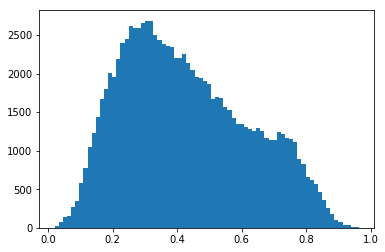

In [36]:
m3 = m.model1.predict(generated_features)
plt.hist(m3, bins='auto')
plt.show()

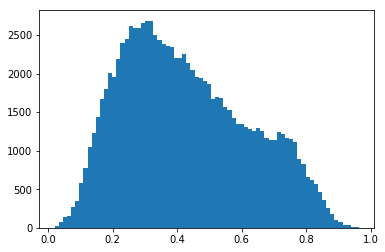

In [37]:
m4 = m.model1.predict(generated_features)
plt.hist(m4, bins='auto')
plt.show()

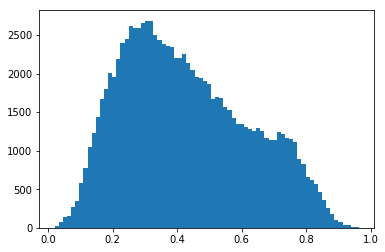

In [38]:
m5 = m.model1.predict(generated_features)
plt.hist(m5, bins='auto')
plt.show()

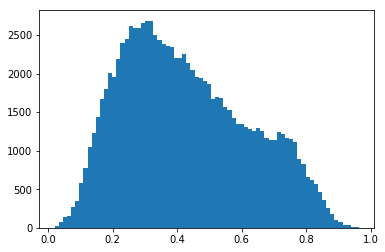

In [39]:
m6 = m.model1.predict(generated_features)
plt.hist(m6, bins='auto')
plt.show()